In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import profile_report
import pickle

In [13]:
df = pd.read_csv('ai4i2020.csv')

In [14]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [15]:
pf = profile_report.ProfileReport(df)

In [16]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
pf.to_file('pandas_profiling.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Observations:-

1. No missing values
2. High correlations:-
- Machine Failure with HDF, PWF, OSF, TWF
- Air temperature with process temperature
- Torque and Rotational Speed (negative, as expected)
- TWF and machine failure
  

## Can Linear Regression be used here for predicting air temperature?

- As air temperature is a continuous variable, categorical attributes present in the data (machine failure, HDF, PWF, OSF, TWF, RNF) can't be used to make a linear regression model.
- Now, air temperature shows a linear trend only with the process temperature and hence it can only be used to linearly regress the air temperature.

# Model building:-

In [18]:
from sklearn.linear_model import LinearRegression

In [41]:
x = df[['Process temperature [K]']]

In [42]:
y = df[['Air temperature [K]']]

In [44]:
x_train = x.iloc[0:9989] #for training the model

In [45]:
y_train = y.iloc[0:9989] #Ffor training the model

In [46]:
model = LinearRegression()

In [49]:
model.fit(x_train, y_train)

LinearRegression()

In [50]:
model.coef_ #slope

array([[1.18161624]])

In [51]:
model.intercept_ #intercept

array([-66.30341137])

## Saving the model

In [55]:
pickle.dump(model, open('model.sav', 'wb'))

## Model Accuracy

In [56]:
model = pickle.load(open('model.sav', 'rb'))

In [59]:
model.score(x_train, y_train) # given the r^2 values

0.7676066753270123

#### An r^2 value of 0.77 is that great for accuracy

## Model testing

In [61]:
x_test = x.iloc[9989:] #testing data

In [65]:
y_actual = y.iloc[9989:] #testing data

In [66]:
y_predict = model.predict(x_test)

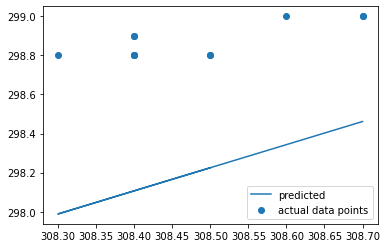

In [71]:
plt.plot(x_test.to_numpy(), y_predict, label = 'predicted')
plt.scatter(x_test.to_numpy(), y_actual.to_numpy(), label = 'actual data points')
plt.legend()
plt.show()

## Hence it is quite clear from the above test c